# &#127794; Digital Champion - Python Session

### &#128210; Inhaltsverzeichnis
* [Entscheidungsbäume](#eb)
* [Data Preprocessing](#dp)
* [Konstruktion: Entscheidungsbaum](#dt)
* [Cost-Complexity Pruning](#ccp)

### &#169; Quellen:
&#128190; **Daten:** https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/
<br>
&#128252;  **Video:** https://youtu.be/q90UDEgYqeI?list=PLBq2sVJiEBvA9rPo3IEQsJNI4IJbn81tB

### &#128161; Weitere Informationen:

``` Decision Trees: ``` &nbsp; https://www.youtube.com/watch?v=7VeUPuFGJHk&t=0s
<br>
``` Cross Validation: ``` &nbsp; https://www.youtube.com/watch?v=fSytzGwwBVw&t=0s
<br>
``` Confusion Matrix: ``` &nbsp; https://www.youtube.com/watch?v=Kdsp6soqA7o&t=0s
<br>
``` Cost-Complexity Pruning: ``` &nbsp; https://www.youtube.com/watch?v=D0efHEJsfHo&t=0s
<br>
``` Bias and Variance and Overfitting: ``` &nbsp; https://www.youtube.com/watch?v=EuBBz3bI-aA&t=0s

## 1 Entscheidungsbäume

### 1.1 Einführung

Jupyter Notebooks sind interaktive Entwicklungsumgebungen, die es ermöglichen, Code, Visualisierungen und Text in einer einzigen Umgebung zu kombinieren. Sie werden häufig für die Datenanalyse, den Code-Austausch und die Dokumentation verwendet. Mit Jupyter Notebooks können Python-Codezellen ausgeführt und die Ergebnisse sofort angezeigt werden. In diesem Jupyter-Notebook werden wir ```Entscheidungsbäume``` betrachten.

### 1.2 Was ist ein Entscheidungsbaum?

Entscheidungsbäume sind eine Methode zur automatischen Klassifizierung von Datenobjekten und damit zur Lösung von Entscheidungsproblemen. Ein Entscheidungsbaum besteht immer aus einem Wurzelknoten (root node) und beliebig vielen inneren Knoten (split node) sowie mindestens zwei Blättern (leaf node). Dabei repräsentiert jeder Knoten eine logische Regel und jedes Blatt eine Antwort auf das Entscheidungsproblem. Im Folgenden ist ein Beispiel für einen Entscheidungsbaum abgebildet:

![alt text for screen readers](./pictures/dt-example-new.png "Beispiel Entscheidungsbaum").

Mit dem abgebildeten Entscheidungsbaum wollen wir mit den Informationen von ```income_usd``` und ```with_mortage``` herausfinden, ob eine Person eine Versicherung hat.

Die folgenden Informationen sind üblicherweise im Entscheidungsbaum abgebildet:
* **gini:** Der Gini-Index beschreibt, wie gut ein Knoten verschiedene Klassen separiert. Der Wert ist immer zwischen 0 und 1. Je kleiner der Gini-Index ist desto besser. Bei der Konstruktion des Entscheidungsbaumes kann der Gini-Index berechnet werden. Es wird immmer die logische Regel gewählt, welche den besten Gini-Index aufweist.
* **samples:** Dieser Wert beschreibt die Anzahl Testobjekte, welche für den Split eines spezifischen Knoten zur Verfügung stehen. Wir sehen beispielsweise, dass für die Konstruktion dieses Baumes 24 Testobjekte verwendet werden. Weiter sehen wir, dass der erste Knoten die 24 Testobjekte in eine Gruppe mit 13 Testobjekte und eine Gruppe mit 11 Testobjekten aufteilt.
* **value:** Value beschreibt, wie die Aufteilung der 'samples' im Knoten aussieht. Der Wert '[15, 9]' im ersten Knoten beschreibt beispielsweise, dass von 24 Testobjekten 15 keine Versicherung und 9 Testobjekte eine Versicherung haben.
* **class:** Dieser Wert steht für die Klasse, die ein spezifischer Knoten erhält. Beispiel: Im ersten Knoten sehen wir, die Klasse 'No insurance', da von den 24 Testobjekten mehr 'No Insurance' (15) haben, als 'Has Insurance' (9). Anhand der Farbe kann ebenfalls die Klasse abgelesen werden. Je röter ein Knoten ist, je mehr gehört er zur Klasse 'No Insurance' und je blauer ein Knoten ist, je mehr gehört er zur Klasse 'Has Insurance'.

<div class="alert alert-block alert-info"> <b>INFO:</b> 
Wie kann man einen Entscheidungsbaum lesen bzw. wie klassifizert der Entscheidungsbaum neue Datenobjekte:

- Wir starten immer beim Wurzelknoten, d.h. ganz oben im Entscheidungsbaum

- Wenn die logische Regel im Knoten für das Datenobjekt korrekt ist, geht man nach links und wenn sie falsch ist, geht man nach rechts

- Wir durchlaufen den Baum solange, bis wir in einem Blatt ankommen. Das 'class' Attribute im Blatt beschreibt die Klasse des neuen Datenobjekts 

</div>

<div class="alert alert-block alert-success"> <b>AUFGABE 1:</b> Bestimme die Klasse der beiden nachfolgeden Datenobjekte anhand des oben abgebildeten Entscheidungsbaums:

- Datenobjekt 1: income_usd = 100'000; with_mortage = 0

- Datenobjekt 2: income_usd = 73'000; with_mortage = 1

</div>

In [97]:
# Eigene Lösung


<div class="alert alert-block alert-warning"> <b>LÖSUNG 1:</b> Klassen:

- Datenobjekt 1 = 'Has Insurance'

- Datenobjekt 2 = 'Has Insurance' 

</div>

### 1.3 Aufgabenstellung

In diesem Jupyter-Notebook arbeiten wir mit dem ['heart-disease'](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/) Datenset. Das Datenset ist eine Tabelle mit 14 Spalten und 303 Zeilen. Eine kurze Beschreibung der verschiedenen Spalten:
* age: Alter
* sex: Mann/Frau
* cp: chest pain type (typische Angina, atypische Angina, nicht-anginös, asymptomatisch)
* restbp: resting blood pressure (Ruheblutdruck (in mm Hg bei Aufnahme ins Krankenhaus))
* chol: Serumcholesterin in mg/dl
* fbs: wenn der Nüchternblutzucker > 120 mg/dl liegt
* restecg: Ergebnisse des Ruhe-Elektrokardiogramms (normal, STT-Anomalie, LV-Hypertrophie)
* thalach: maximale Herzfrequenz erreicht
* exang: Belastungsangina (Richtig/Falsch)
* oldpeak: ST-Depression durch körperliche Betätigung im Vergleich zur Ruhe
* slope: die Steigung des Spitzenbelastungs-ST-Segments
* ca: Anzahl der großen Gefäße (0-3), gefärbt durch Fluoroskopie
* thal: normal; behobener Defekt; reversibler Defekt
* hd: Art der Herzerkrankung

Eine Zeile in dieser Tabelle entspricht genau einem Testobjekt. Das heisst, wir arbeiten mit 303 Testobjekten. Unser Ziel ist es, mit diesen 303 Testobjekten ein Modell zu generieren, welches neue Datenobjekte klassifizieren und somit bestimmen kann, ob eine Herzerkrankung vorliegt oder nicht. Im Modell nutzen wir die folgenden Features um die Zielvariable (hd) vorherzusagen:
<br>
<br>
```age```, ```sex```, ```cp```, ```restbp```, ```chol```, ```fbs```, ```restecg```, ```thalach```, ```exang```, ```oldpeak```, ```slope```, ```ca```, ```thal```

Wir verwenden einen Entscheidungsbaum für die Klassifikation von Herzkrankheiten

## 2 Data Preprocessing

### 2.1 Read data

Bei jedem neuen Python-Projekt überlegen wir uns, welche Python-Bibliotheken wir verwenden möchten. Eine Python-Bibliothek ist ein wiederverwendbarer Codeblock, den wir in einem Programme bzw. Projekt einbinden können. Das Einbinden von solchen Codeblocks ist einiges schneller als den Code selber zu schreiben.

<div class="alert alert-block alert-info"> <b>INFO:</b> 
Wenn wir in Python programmieren, ist es wichtig zu wissen, dass alles was hinter einem '#' steht kein Code ist, sondern nur ein Kommentar um den Code zu beschreiben. </div>

In [98]:
%%capture
pip install pandas numpy matplotlib scikit-learn

In [99]:
# Bibliotheken importieren
# pandas: Daten lesen und bearbeiten
import pandas as pd
# numpy: berechnen von KPIs
import numpy as np
# plt: ploten von Grafiken
import matplotlib.pyplot as plt
# DecisionTreeClassifier: Modellierungskit für Entscheidungsbäume
from sklearn.tree import DecisionTreeClassifier
# plot_tree: Entscheidungsbaum als Grafik ploten
from sklearn.tree import plot_tree
# train_test_split: Hilfe um Testobjekte in Training- bzw. Testset zu splitten
from sklearn.model_selection import train_test_split
# cross_val_score: Kreuzvalidierung
from sklearn.model_selection import cross_val_score
# confusion_matrix: Konfusionsmatrix ploten
from sklearn.metrics import confusion_matrix
# ConfusionMatrixDispla: Konfusionsmatrix ploten
from sklearn.metrics import ConfusionMatrixDisplay

<div class="alert alert-block alert-info"> <b>INFO:</b>  In Python kann man mit Hilft des '=' Operatros Daten in einer Variable speichern. Wenn wir beispielsweise die Zahl 5 in der Variable 'a' speichern möchten, können wir das mit dem folgenden Code machen:
<br><br>
a = 5 
</div>

In [100]:
# 'heart-disease' Daten einlesen und in 'df' als Tabelle speichern
df = pd.read_csv('data/processed.cleveland.data', header=None, sep=',', encoding='latin')

<div class="alert alert-block alert-success"> <b>AUFGABE 2:</b> 
Speichere die Daten in der Variable 'df_start'
</div>

In [101]:
# Eigene Lösung:


<div class="alert alert-block alert-warning"> <b>LÖSUNG 2:</b> Die Lösung befindet sich in der nachfolgenden Code-Zelle </div>

In [102]:
df_start = df

---

In [103]:
# Die Funktion .head() zeigt, wie die ersten fünf Spalten in der Tabelle aussehen
df_start.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [104]:
# Wir sehen, dass die Spalten keine Namen haben
# Mit dem untenstehenden Code könenen wir den Spalten Namen geben
column_name_list = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']
df_start.columns = column_name_list
df_start.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### 2.2 Fehlenden Daten

In [105]:
# Das Attribut .dtypes zeigt, welchen Datentyp die Spalten haben:
# float64: Daten mit Zahlen mit Nachkommastellen (z.B. Körpergrösse)
# object: Daten mit Kategorien (z.B. Mann / Frau)
df_start.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [106]:
# Wenn wir den Spaltennamen in eckige Klammer schreiben, z.B. ['Spaltenname'], erhalten wir die Werte dieser Spalte
df_start['ca']

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302      ?
Name: ca, Length: 303, dtype: object

In [107]:
# Die Funktion .unique() zeigt allte einzigartigen Elemente in der Spalte 'ca'
df_start['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [108]:
# Wir sehen, dass die Daten ein '?' enthalten
# Dieses '?' möchten wir entfernen, da ein Entscheidungsbaum mit fehlenden Daten nicht umgehen kann
# [Tabellenname['Spaltenname'] == 'zu prüfender Text'] so kann eine Tabelle nach einem spezifischen Spaltenwert gefiltert werden
df_start[df_start['ca'] == '?']

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


<div class="alert alert-block alert-info"> <b>INFO:</b> Die wichtigsten Vergleichsoperatoren:
    
* ==: zu vergleichendes Element muss den gleichen Inhalt haben
* !=: zu vergleichendes Element darf nicht den gleichen Inhalt haben
* \>=: zu vergleichende Zahl muss gleich grösser sein
* <=: zu vergleichende Zahl muss gleich kleiner sein
     
     </div>

In [156]:
# Die Funktion len() gibt als Output an, wie viele Zeilen eine Tabelle enthält
len(df_start[df_start['ca'] == '?'])

4

<div class="alert alert-block alert-success"> <b>AUFGABE 3:</b> 
Wir haben gesehen, dass nur 4 Testobjekte in der Spalte 'ca' ein '?' enthalten. Weil es nur so wenige Testobjekte sind, wollen wir diese aus unserer 'df_start' Tabelle rausfiltern und die neue Tabelle unter 'df_no_missing_1' speichern.
    
</div>

In [110]:
# Eigene Lösung:


<div class="alert alert-block alert-warning"> <b>LÖSUNG 3:</b> Die Lösung befindet sich in der nachfolgenden Code-Zelle </div>

In [111]:
df_no_missing_1 = df_start[df_start['ca'] != '?']

---

<div class="alert alert-block alert-success"> <b>AUFGABE 4:</b> 
Auch in der Spalte 'thal' hat es fehlende Daten. Prüfe wie viele Testobjekte fehlende Daten in der Spalte 'thal' haben. Filtere die betroffenen Testobjekte aus der Tabelle 'df_no_missing_1' raus und speichere die neue Tabelle unter 'df_no_missing_2'
</div>

In [112]:
# Eigene Lösung:


<div class="alert alert-block alert-warning"> <b>LÖSUNG 4:</b> Die Lösung befindet sich in der nachfolgenden Code-Zelle </div>

In [113]:
print(df_no_missing_1['thal'].unique())
print(len(df_no_missing_1[df_no_missing_1['thal'] == '?']))
df_no_missing_2 = df_no_missing_1[df_no_missing_1['thal'] != '?']

['6.0' '3.0' '7.0' '?']
2


<div class="alert alert-block alert-info"> <b>INFO:</b>
    
Python als Taschenrechner: Rechungen in Python sind einfach zu implementieren. Untenstehend findet sich ein Beispiel:
    
</div>

In [157]:
# hier prüfen wir wie viele Zeilen unsere Tabelle 'df_no_missing_2' haben würde, wenn wir 100 Testobjekte hinzufügen
len(df_no_missing_2) + 100

397

<div class="alert alert-block alert-success"> <b>AUFGABE 5:</b> 

Wenn 'df_start' 100% aller Testobjekte enthält, wie viel Prozent aller Testobjekte finden sich dann noch in 'df_no_missing_2'? <br>Hint: Zum Lösen dieser Aufgabe muss 2x die len() Funktion eingesetzt werden.
    
</div>

In [115]:
# Eigene Lösung:


<div class="alert alert-block alert-warning"> <b>LÖSUNG 5:</b> Die Lösung befindet sich in der nachfolgenden Code-Zelle </div>

In [116]:
len(df_no_missing_2) / len(df_start) * 100

98.01980198019803

In [117]:
# hier prüfen wir, ob wir alle '?' entfernt haben
df_no_missing_2['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [118]:
# hier prüfen wir, ob wir alle '?' entfernt haben
df_no_missing_2['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

### 2.3 Ausreisser

Bei den folgenden Spalten vermuten wir Ausreisser (Outliers):
* age
* tahlach
* slope

Eine Möglichkeit Daten auf Ausreisser zu prüfen sind Boxplots. Boxplots zeigen wie die Daten verteilt sind.

![alt text for screen readers](./pictures/boxplot-new.png "Beispiel Boxplot").

<AxesSubplot:>

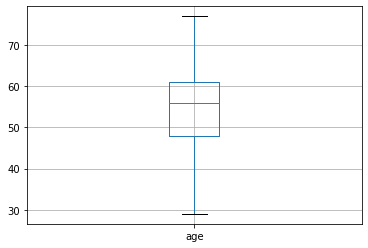

In [158]:
# Mit der Funktion .boxplot('Spaltenname'), können wir einen Boxplot einer spezifischen Spalte erstellen
df_no_missing_2.boxplot('age')

In [120]:
# Wir sehen, dass es in der Spalte 'age' einen Outlier hat
# Das entsprechende Testobjekt möchten wir entfernen
# Die Funktionen .max() bzw .min() zeigen den grössten bzw. den kleinsten Wert einer Spalte
df_no_missing_2['age'].max()

77.0

In [121]:
# Jetzt können wir das entsprechende Testobjekt aus unser Tabelle entfernen
# Info: Hier vergleichen wir mit einer Zahl -> 150 und nicht '150'
df_clean_help = df_no_missing_2[df_no_missing_2['age'] != 150]

<div class="alert alert-block alert-success"> <b>AUFGABE 6:</b> 

Prüfe die Spalten 'thalach' und 'slope' auf Ausreisser und entferne alle entsprechenden Testobjekte. Speichere die neue Tabelle unter 'df_clean'.

</div>

In [122]:
# Eigene Lösung:


<div class="alert alert-block alert-warning"> <b>LÖSUNG 6:</b> Die Lösung befindet sich in der nachfolgenden Code-Zellen </div>

<AxesSubplot:>

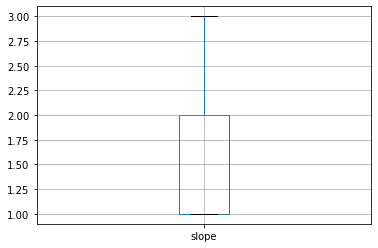

In [123]:
df_clean_help.boxplot('slope')

<AxesSubplot:>

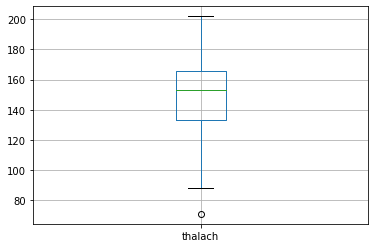

In [124]:
df_clean_help.boxplot('thalach')

In [125]:
df_clean_help['thalach'].min()
df_clean = df_clean_help[df_clean_help['thalach'] != 71]

---

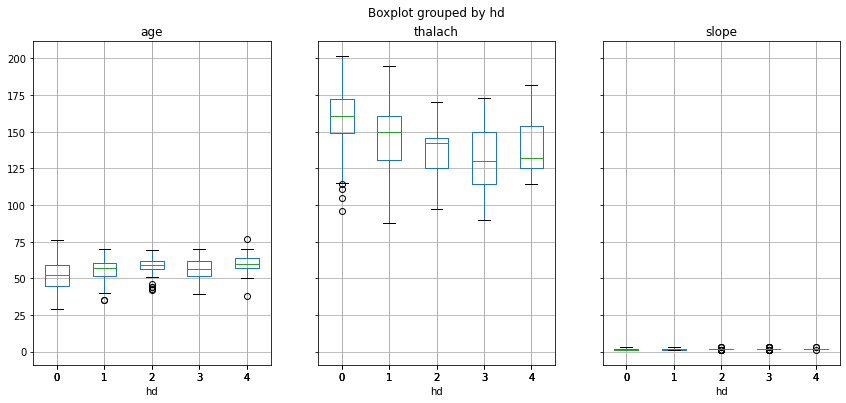

In [155]:
# Wir prüfen, ob alle Ausreisser entfernt worden sind
df_clean.boxplot(column=['age', 'thalach', 'slope'], by='hd', layout=(1,3), figsize=(14,6))
plt.show()

In [152]:
# prüfen ob alle outlier entfernt wurden
# df_clean.boxplot('age')

In [153]:
# prüfen ob alle outlier entfernt wurden
# df_clean.boxplot('slope')

In [159]:
# prüfen ob alle outlier entfernt wurden
# df_clean.boxplot('thalach')</div><i class="fa fa-lightbulb-o "></i>

### 2.4 Daten formatieren
In einem nächsten Schritt müssen wir die Daten in zwei Teile auftrennen. Alle Features kommen in den Vektor 'X'. Die Werte der Zielvariablen kommen in den Vektor 'y'.

In [60]:
# in diesem Schritt speichern wir alle Features in 'X'
# .drop('Spaltenname', axis=1) kann verwendet werden um eine Spalte zu entfernen
# mit .copy() kopieren wir das Resultat in eine neue Variable
X = df_clean.drop('hd', axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [61]:
# in diesem Schritt speichern wir alle Zielvariablen in 'y'
y = df_clean['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

Wir wissen bereits, dass jede Spalte einen spezifischen Datentyp hat. Basierend auf diesem Wissen müssen wir die Daten in 'X' weiter formatieren.

Wir haben mit allen kategorischen Daten in dieser Tabelle folgendes Problem:
* Entscheidungsbäume unterstützen keine Featrues mit kategorischen Datentypen. Eine Lösung wäre, Features mit kategorische Daten in Zahlen umzuwandeln (z. B. Biene = 1, Elefant = 2, Vogel = 3). Dies funktioniert jedoch nicht. Wenn wir dies tun würden, würde der Baum annehmen, dass Elefanten und Bienen (|1-2|=1) ähnlicher sind als Bienen und Vögel (|1-3|=2). Dies aus dem Grund, dass die logischen Regeln in den Knoten der Entscheidungsbäume, die Testobjekte immer auf einen spezifische Bereich prüfen (z.B. >= oder <=).

One-Hot-Encoding als Lösung für das Problem:
* Wir erstellen für jede einzelne Kategorie in einer Spalte bzw. Feature eine eigene separate 'Kategoriespalte' in der 'X' Tabelle. Für jede 'Kategoriespalte' geben wir den Wert 0 oder 1 ein, basierend auf der Tatsache, ob dieses bestimmte Merkmal für den Datensatz wahr ist (1) oder nicht (0). Diese Technik wird „One-Hot-Encoding“ genannt. Das heisst wir machen aus einem Feature viele. Der Entscheidungsbaum kann mit Features welche nur 0 oder 1 enthalten umgehen (z.B. Feature 1 >= 0.5).

Die folgenden Features enthalten kategorische Daten:
* 'cp'
* 'restecg'
* 'slope'
* 'thal'

In [62]:
# welche eindeutigen kategorischen Features sind in 'cp' vorhanden?
X['cp'].unique()

array([1., 4., 3., 2.])

In [63]:
# mit pd.get_dummies(Tabellenname, columns=[Spaltenname1, Spaltenname2], dtype=int) kann man spezifische Features One-Hot-Encoden
# One-Hot-Encoding für die Saplte 'cp'
pd.get_dummies(X, columns=['cp'], dtype=int).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


<div class="alert alert-block alert-success"> <b>AUFGABE 7:</b> 

Die folgenden Features in der Tabelle 'X' müssen One-Hot-Encoded werden:
* 'cp'
* 'restecg'
* 'slope'
* 'thal'

Speichere die neue Tabelle in 'X_encoded'.
    
</div>

In [ ]:
# Eigene Lösung:
X_encoded = 

<div class="alert alert-block alert-warning"> <b>LÖSUNG 7:</b> Die Lösung befindet sich in der nachfolgenden Code-Zelle </div>

In [64]:
X_encoded = pd.get_dummies(X,
                           columns=['cp',
                                    'restecg',
                                    'slope',
                                    'thal'],
                            dtype=int)
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [65]:
# wir sehen, dass y diverse Werte enthält
# y > 0 heisst, es ist eine Herzkrankheit vorhanden (1, 2, 3, 4 stehen für spezifische Krankheiten)
# y = 0 heisst, es ist keine Herzkrankheit vorhanden
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [66]:
# da wir nur herausfinden wollen, ob eine Krahnkeit vorhanden ist oder nicht, ersetzen wird die Werte 2, 3 und 4 mit 1 -> die neue Bedeutung der y Werte findet sich untenstehend
# y = 0 heisst, es ist keine Herzkrankheit vorhanden
# y = 1 heisst, es ist eine Herzkrankheit vorhanden
# als erstes definieren wir eine Bedingung
y_not_zero_index = y > 0
# [Bedingung] so filtern wir alle Elemente die einer Bedingung entsprechen
y[y_not_zero_index] = 1
y.unique()

array([0, 1], dtype=int64)

Im nächsten Schritt unterteilen wir unsere Daten in ein 'Trainings-' und in ein 'Testset':
- Trainingsset: Wird verwendet, um einen Baum auf spezifische Testobjekte zu modellieren, trainieren und ihm die spezifischen Eigenschaften eines Datensatzes mit Testobjekten beizubringen
- Testset: Wird verwendet, um den Baum zu testen und zu kontrollieren, wie gut er mit neuen Datenobjekten abschneidet

In [67]:
# mit der Funktion train_test_split() kann man die Daten in ein Testset bzw. Trainset teilen
# Standardmäßig sind im Testset 25% der Daten vorhanden und im Trainingsset 75%
# wir sehen, dass train_test_split() 4 Tabellen generiert
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

## 3 Konstruktion: Entscheidungsbaum

A general concept to work with decision trees:
1) Build a preliminary classification tree as base model
2) Try to improve the prelimiary classification tree by optimizing the different parameters

In [68]:
# create a decision tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

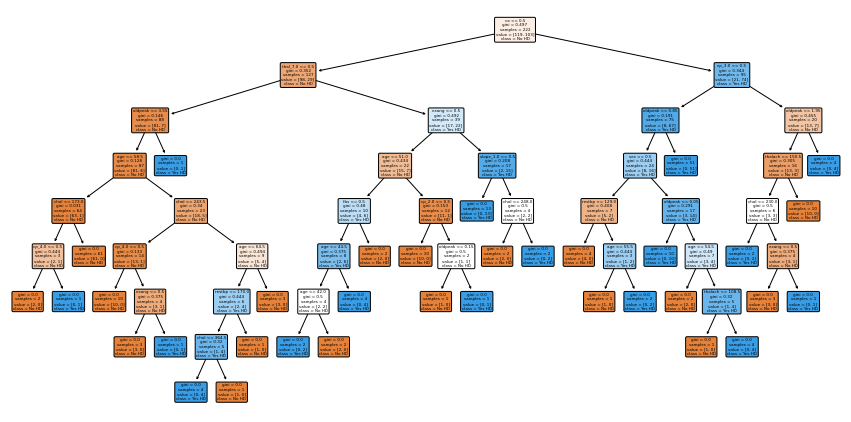

In [69]:
# plot the tree
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns)
plt.show()

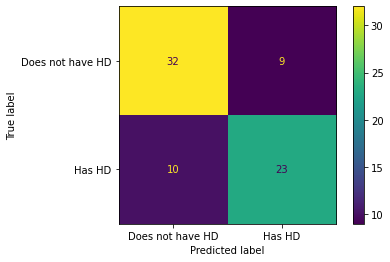

In [70]:
# test with the testing set how well this tree performs for classification
predictions = clf_dt.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Does not have HD', 'Has HD'])
disp.plot()
plt.show()

31: Do not have HD -> and were predicted correctly <br>
11: Do not have HD -> and were predicted wrong <br>
26: Have HD -> and were predicted correctly <br>
7: Have HD -> and were predicted wrong

In [71]:
# how to improve? -> pruning (with pruning we can make sure that we do not overfit)


## 4 Cost-Complexity Pruning

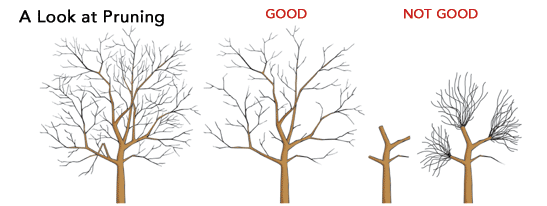

Decision trees are often overfit. We can use different kind of parameters to solve this problem (e.g. 'max_depth' or 'min_samples'). We can use 'cost complexity pruning' as a process to find a smaller tree, which gives a better performance with the test data. The goal is to find the right 'alpha'. 'alpha' defines how much pruning happens.

Values of 'alpha':
- 0: full size tree
- as bigger alpha gets as smaller the tree will be

In [72]:
# define values for alpha
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
# extract different values for alpha
ccp_alphas = path.ccp_alphas
# exclude maximum value for alpha (max value -> has no leaves)
ccp_alphas = ccp_alphas[:-1]

# list to store a specific decision tree for a specific alpha
clf_dts = []

# create a loop to construct for every alpha one tree
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

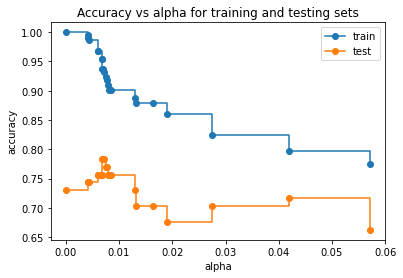

In [73]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [74]:
# which are are alpha values
ccp_alphas

array([0.        , 0.00412913, 0.00418275, 0.00443412, 0.00600601,
       0.00600601, 0.00675676, 0.00675676, 0.00686401, 0.00702681,
       0.00720721, 0.00752517, 0.00772049, 0.00794913, 0.00810811,
       0.00844595, 0.01292048, 0.01311766, 0.01633634, 0.01903153,
       0.02749829, 0.04199305, 0.05716241])

Based on the graphic and the alphas list we see that 0.01604051 is the best value for alpha!

New Problem: How do we know that we did choose the best possible test-train-split? Maybe another train-test-split would be even better for this problem.

Solution: We can use 10-Fold Cross Validation

### Build a classification tree and use cross validation for finding best alpha

<AxesSubplot:xlabel='tree'>

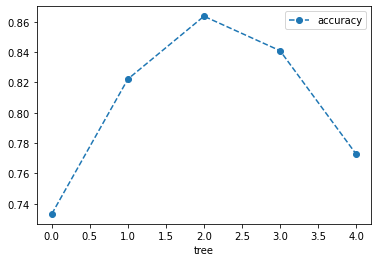

In [75]:
# create tree with best alpha
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

# use 5-fold cross validation, create 5 different training and testing datasets
# use the differents datasets tor train and test the tree
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree':range(5), 'accuracy':scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<AxesSubplot:xlabel='alpha'>

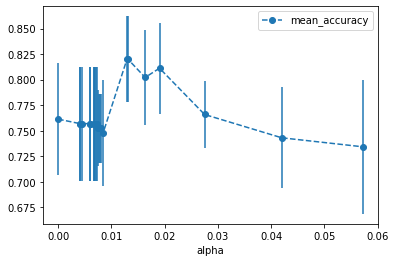

In [76]:
# list to store results for each fold during cross validation
alpha_loop_values = []

# create a loop to construct for every alpha 5 tees (1 for each fold)
# store mean and standard deviation of the scores (accuracy) for each call
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

# draw a graph for the results
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker='o',
                   linestyle='--')

Based on the graphic and the alphas list we see that 0.01422475 is the best value for alpha!

In [77]:
ideal_ccp_alpha = 0.014224751066856333
ideal_ccp_alpha

0.014224751066856334

### Build the final classification tree

In [78]:
# build the tree
clf_dt_pruned = DecisionTreeClassifier(random_state=42,
                                       ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

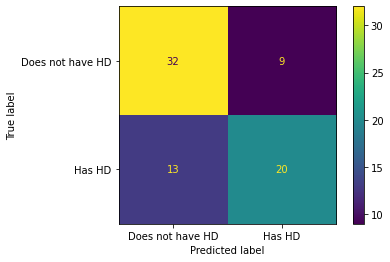

In [79]:
# plot the confusion matrix
predictions_p = clf_dt_pruned.predict(X_test)
cm_p = confusion_matrix(y_test, predictions_p, labels=clf_dt_pruned.classes_)
disp_p = ConfusionMatrixDisplay(confusion_matrix=cm_p,
                              display_labels=['Does not have HD', 'Has HD'])
disp_p.plot()
plt.show()

[Text(0.4230769230769231, 0.875, 'ca <= 0.5\ngini = 0.497\nsamples = 222\nvalue = [119, 103]\nclass = No HD'),
 Text(0.15384615384615385, 0.625, 'thal_7.0 <= 0.5\ngini = 0.352\nsamples = 127\nvalue = [98, 29]\nclass = No HD'),
 Text(0.07692307692307693, 0.375, 'gini = 0.146\nsamples = 88\nvalue = [81, 7]\nclass = No HD'),
 Text(0.23076923076923078, 0.375, 'exang <= 0.5\ngini = 0.492\nsamples = 39\nvalue = [17, 22]\nclass = Yes HD'),
 Text(0.15384615384615385, 0.125, 'gini = 0.434\nsamples = 22\nvalue = [15, 7]\nclass = No HD'),
 Text(0.3076923076923077, 0.125, 'gini = 0.208\nsamples = 17\nvalue = [2, 15]\nclass = Yes HD'),
 Text(0.6923076923076923, 0.625, 'cp_3.0 <= 0.5\ngini = 0.344\nsamples = 95\nvalue = [21, 74]\nclass = Yes HD'),
 Text(0.5384615384615384, 0.375, 'oldpeak <= 0.85\ngini = 0.191\nsamples = 75\nvalue = [8, 67]\nclass = Yes HD'),
 Text(0.46153846153846156, 0.125, 'gini = 0.444\nsamples = 24\nvalue = [8, 16]\nclass = Yes HD'),
 Text(0.6153846153846154, 0.125, 'gini = 0.0

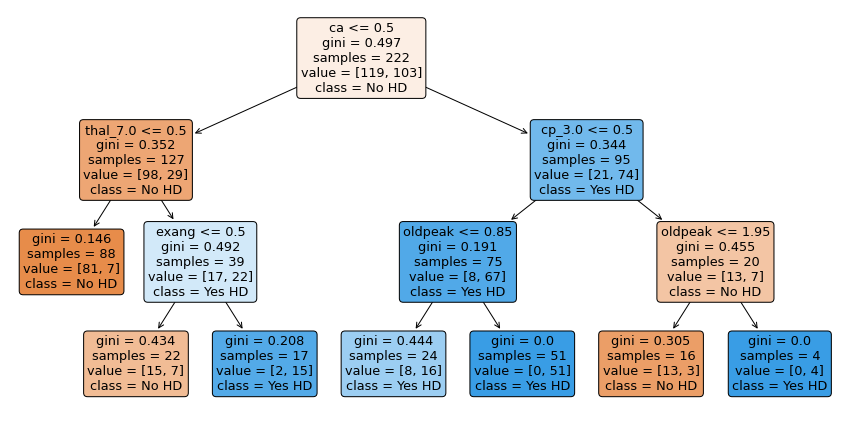

In [80]:
# plot the tree
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns)

Interpretation:
- If statement is correct go to the left
- If statement is wrong go to the right
- Gini
- 'Samples' describes how many test objects are in this node
- 'value' or '[118, 104]' describes the number of classification in thsi node (118 no HD, 104 with HD)
- 'class' describes the class with the majority (color of node describes the same)